In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("food_orders_new_delhi.csv")
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [4]:
df['Delivery Date and Time']=pd.to_datetime(df['Delivery Date and Time'])
df['Order Date and Time']=pd.to_datetime(df['Order Date and Time'])

In [5]:
def extract_discount(discount_str):
    if 'off' in discount_str:
        # Fixed amount off
        return float(discount_str.split(' ')[0])
    elif '%' in discount_str:
        # Percentage off
        return float(discount_str.split('%')[0])
    else:
        # No discount
        return 0.0

In [6]:
df['Discount Percentage'] = df['Discounts and Offers'].apply(lambda x: extract_discount(str(x)))


In [7]:
df[df['Discount Percentage']>40]

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0
18,19,C5555,R2348,2024-01-31 17:27:17,2024-01-31 18:53:17,1798,50,Credit Card,50 off Promo,191,44,0,50.0
28,29,C4005,R2327,2024-01-17 23:01:31,2024-01-18 00:55:31,155,0,Cash on Delivery,50 off Promo,151,35,0,50.0
35,36,C4890,R2608,2024-01-04 10:48:10,2024-01-04 11:21:10,203,20,Cash on Delivery,50 off Promo,125,22,0,50.0
54,55,C4843,R2734,2024-01-23 04:22:25,2024-01-23 05:25:25,672,50,Digital Wallet,50 off Promo,98,29,0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,980,C2759,R2001,2024-01-08 16:41:57,2024-01-08 17:56:57,723,0,Credit Card,50 off Promo,199,33,0,50.0
983,984,C9914,R2933,2024-01-01 20:33:17,2024-01-01 21:38:17,1229,20,Digital Wallet,50 off Promo,74,41,0,50.0
987,988,C9477,R2827,2024-01-06 15:13:19,2024-01-06 16:49:19,1219,0,Credit Card,50 off Promo,106,11,0,50.0
992,993,C6490,R2230,2024-01-18 01:39:24,2024-01-18 03:17:24,908,30,Digital Wallet,50 off Promo,138,45,0,50.0


In [8]:
df['Discount amount']= df.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                                   if x['Discount Percentage'] <45
                                                   else x['Discount Percentage'], axis=1)


In [9]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount amount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15.0,140.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0,0.0,0.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0,50.00


In [10]:
df['cost']=df['Delivery Fee']+df['Payment Processing Fee']+df['Discount amount']
df['Revenue']=df['Commission Fee']
df['profit']=df['Revenue']-df['cost']

In [11]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount amount,cost,Revenue,profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15.0,140.55,215.55,195,-20.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0,0.0,0.00,77.00,146,69.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0,50.00,130.00,130,0.00


In [12]:
total_orders=df.shape[0]
total_revenue=df['Revenue'].sum()
total_costs=df['cost'].sum()
total_profit=df['profit'].sum()

In [13]:
overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit
}
print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 132741.84999999998, 'Total Profit': -5751.85}


### Based on the analysis, here are the overall metrics for the food delivery operations:

#### Total Orders: 1,000
#### Total Revenue (from Commission Fees): 126,990 INR
#### Total Costs: 132741.84999 INR (including delivery fees, payment processing fees, and discounts)
#### Total Profit: -5751.85 INR

The analysis indicates that the total costs associated with the food delivery operations exceed the total revenue generated from commission fees, resulting in a net loss. It suggests that the current commission rates, delivery fees, and discount strategies might not be sustainable for profitability.

## Visualizing

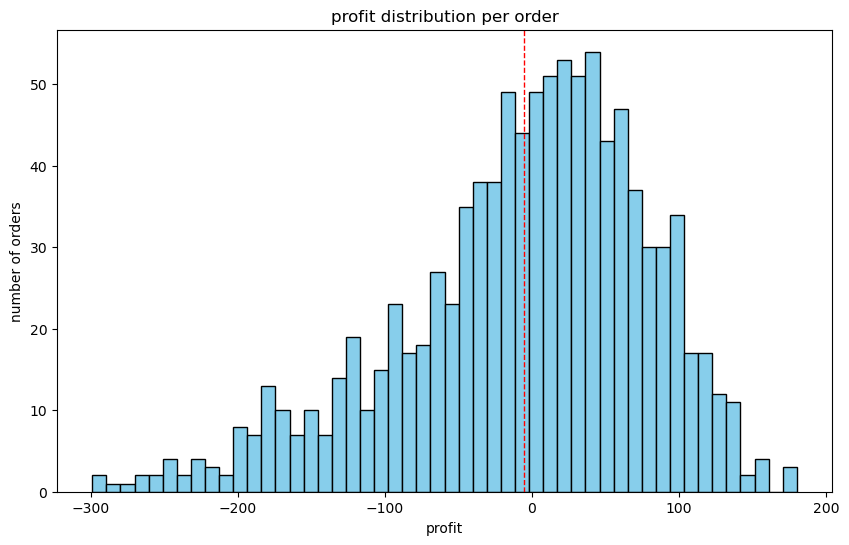

In [97]:
plt.figure(figsize=(10,6))
plt.hist(df['profit'],bins=50,color='skyblue',edgecolor="black")
plt.title("profit distribution per order")
plt.xlabel("profit")
plt.ylabel("number of orders")
plt.axvline(df['profit'].mean(), color='red', linestyle='dashed', linewidth=1)

Text(0.5, 1.0, 'proportion of total cost in food delivery')

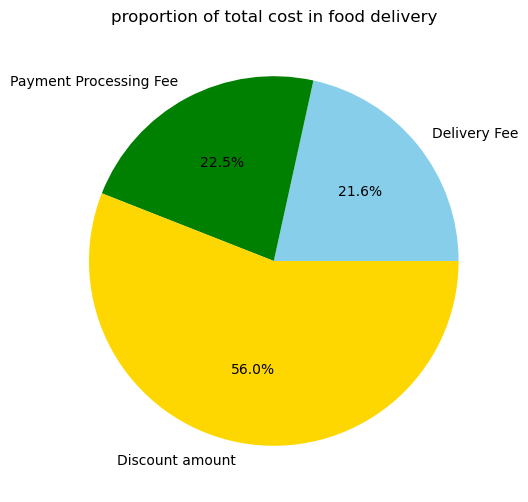

In [98]:
cost_breakdown=df[['Delivery Fee','Payment Processing Fee','Discount amount']].sum()
plt.figure(figsize=(6,6))
plt.pie(cost_breakdown,labels=cost_breakdown.index,autopct='%1.1f%%',colors=['skyblue','green','gold'])
plt.title("proportion of total cost in food delivery")

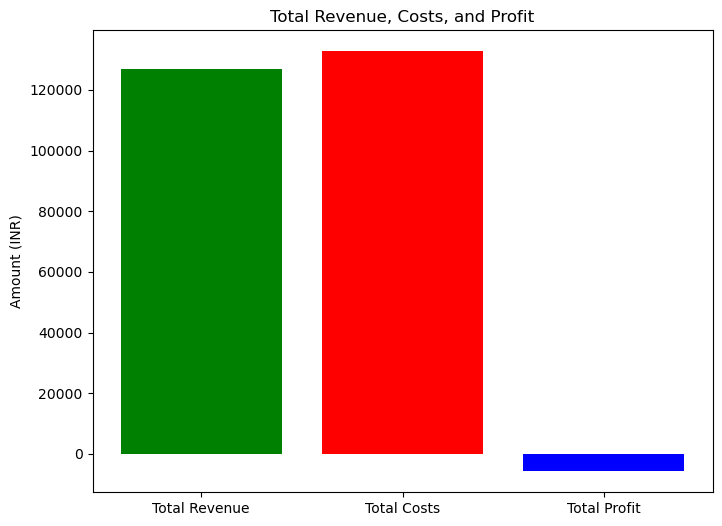

In [99]:
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

## Making new strategies

In [14]:
profitable_order=df[df['profit']>0]
profitable_order['commission percentage']=(df['Commission Fee']/df['Order Value'])*100
profitable_order['Discount percentage']=(df['Discount amount']/df['Order Value'])*100

C:\Users\HP\AppData\Local\Temp\ipykernel_6852\1369595474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_order['commission percentage']=(df['Commission Fee']/df['Order Value'])*100
C:\Users\HP\AppData\Local\Temp\ipykernel_6852\1369595474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_order['Discount percentage']=(df['Discount amount']/df['Order Value'])*100


In [15]:
new_avg_commission=profitable_order['commission percentage'].mean()
new_avg_discount=profitable_order['Discount percentage'].mean()

print(new_avg_commission, new_avg_discount)

27.70652808215974 5.6237120422538


In [16]:
reccommented_commission_percentage=28
recommende_discount_percentage=6

df['new_effective_commission']=df['Order Value']*(reccommented_commission_percentage/100)
df['new_effecctive_discount']=df['Order Value']*(recommende_discount_percentage/100)

In [17]:
df['simulated cost']=df['Delivery Fee']+df['Payment Processing Fee']+df['new_effecctive_discount']
df['simulated profit']=df['new_effective_commission']-df['simulated cost']

In [18]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,...,Refunds/Chargebacks,Discount Percentage,Discount amount,cost,Revenue,profit,new_effective_commission,new_effecctive_discount,simulated cost,simulated profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,...,0,5.0,95.70,142.70,150,7.30,535.92,114.84,161.84,374.08
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,...,0,10.0,98.60,161.60,198,36.40,276.08,59.16,122.16,153.92
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,...,0,15.0,140.55,215.55,195,-20.55,262.36,56.22,131.22,131.14
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,...,0,0.0,0.00,77.00,146,69.00,409.64,87.78,164.78,244.86
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,...,0,50.0,50.00,130.00,130,0.00,557.76,119.52,199.52,358.24


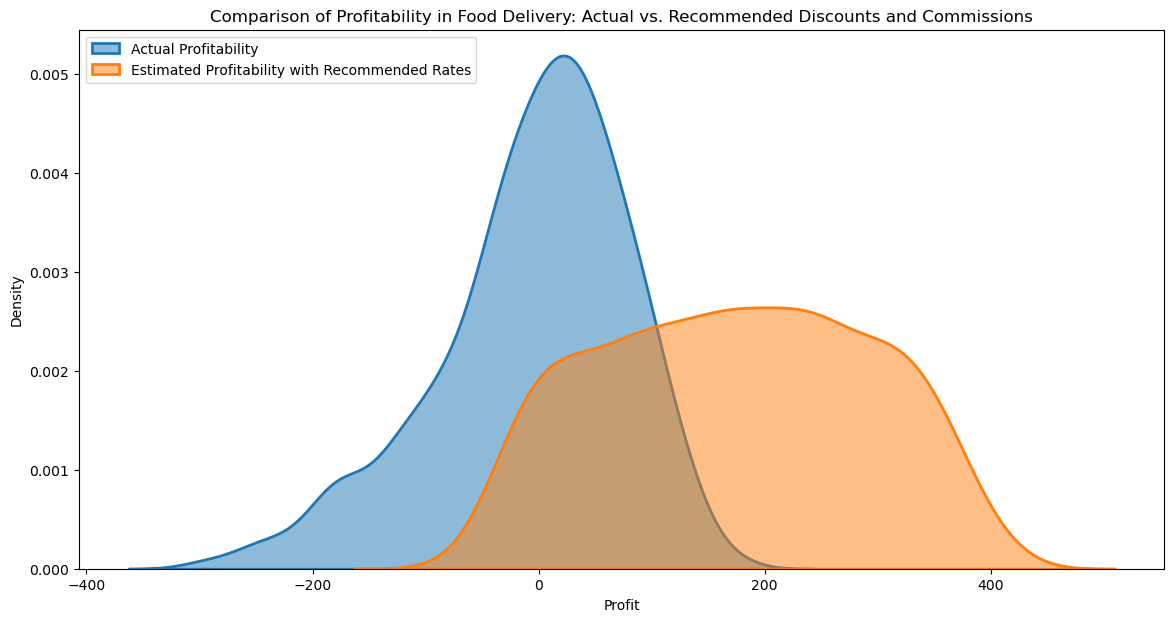

In [19]:
plt.figure(figsize=(14, 7))

# actual profitability
sns.kdeplot(df['profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(df['simulated profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')


## Summary

### New Average Commission Percentage: 30.51%

### New Average Discount Percentage: 5.87%

The average commission percentage for profitable orders is significantly higher than the overall average across all orders. It suggests that a higher commission rate on orders might be a key factor in achieving profitability. The average discount percentage for profitable orders is notably lower than the overall average, indicating that lower discounts might contribute to profitability without significantly deterring order volume.

## Based on this analysis, a strategy that aims for a commission rate closer to 30% and a discount rate around 6% could potentially improve profitability across the board.

